In [1]:
import numpy as np
import pandas as pd
import pandasql
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import feature_selection
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import f1_score
import sklearn.learning_curve as curves
import matplotlib.pyplot as plt
from time import time
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

%matplotlib inline

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/amywu/anaconda3/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  

In [2]:
df_t = pd.read_csv('test_table.csv')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [3]:
df_t.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [4]:
df_u = pd.read_csv('user_table.csv')
df_u.info()
df_u.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [5]:
df_u[df_u['user_id'] == 315281]

,user_id,sex,age,country
19877,315281,M,32,Spain


In [6]:
#for item in list(df_t):
#    plt.figure()
#   ax = sns.countplot(x = df_t[item], data = df_t)

In [7]:
print "conversion rate is {} % for control group.".format(float(len(df_t[(df_t['test'] == 0) & (df_t['conversion'] == 1)])) / len(df_t[df_t['test'] == 0] * 100))
print "conversion rate is {} % for test group.".format(float(len(df_t[(df_t['test'] == 1) & (df_t['conversion'] == 1)])) / len(df_t[df_t['test'] == 1] * 100))

conversion rate is 0.0551786903067 % for control group.
conversion rate is 0.0434247139821 % for test group.


In [8]:
print "there are {} unique users in {} samples in test table".format(len(set(df_t['user_id'])), len(df_t['user_id']))
print "there are {} unique users in {} samples in user table".format(len(set(df_u['user_id'])), len(df_u['user_id']))

there are 453321 unique users in 453321 samples in test table
there are 452867 unique users in 452867 samples in user table


In [9]:
print "All users in test table are in user table? {}".format(set(df_u['user_id'].isin(df_t['user_id'].values)))

All users in test table are in user table? set([True])


In [10]:
df_j = pd.merge(df_t, df_u, on=['user_id'], how='inner')
df_j.info()
df_j.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 12 columns):
user_id             452867 non-null int64
date                452867 non-null object
source              452867 non-null object
device              452867 non-null object
browser_language    452867 non-null object
ads_channel         181693 non-null object
browser             452867 non-null object
conversion          452867 non-null int64
test                452867 non-null int64
sex                 452867 non-null object
age                 452867 non-null int64
country             452867 non-null object
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


In [11]:
df_j['ads_channel'][:10]

0         NaN
1      Google
2    Facebook
3    Facebook
4      Google
5         NaN
6         NaN
7         NaN
8         NaN
9    Facebook
Name: ads_channel, dtype: object

In [12]:
df_j.describe()

,user_id,conversion,test,age
count,452867.000000,452867.000000,452867.000000,452867.000000
mean,499944.805166,0.049560,0.476462,27.130740
std,288676.264784,0.217034,0.499446,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249819.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749543.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [13]:
t, p = ttest_ind(df_j[(df_j['test'] == 1) & (df_j['country'] != 'Spain')]['conversion'], df_j[(df_j['test'] == 0) & (df_j['country'] != 'Spain')]['conversion'], equal_var = False)
print "excluding Spain, control and test group, ttest_ind: t = %g  p = %g" % (t, p)
print 'excluding Spain, test group conversion rate {}.'.format(df_j[(df_j['test'] == 1) & (df_j['country'] != 'Spain')]['conversion'].mean())
print 'excluding Spain, control group conversion rate {}.'.format(df_j[(df_j['test'] == 0) & (df_j['country'] != 'Spain')]['conversion'].mean())

excluding Spain, control and test group, ttest_ind: t = -7.3539  p = 1.92892e-13
excluding Spain, test group conversion rate 0.0434111616784.
excluding Spain, control group conversion rate 0.0482917905575.


ValueError: keyword rotation is not recognized; valid keywords are [u'size', u'width', u'color', u'tickdir', u'pad', u'labelsize', u'labelcolor', u'zorder', u'gridOn', u'tick1On', u'tick2On', u'label1On', u'label2On', u'length', u'direction', u'left', u'bottom', u'right', u'top', u'labelleft', u'labelbottom', u'labelright', u'labeltop']

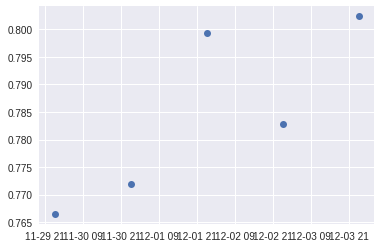

In [22]:
ratio = []
dates = []
for date, value in df_j.groupby('date'):
    ratio.append(value[value['test'] == 1]['conversion'].mean() / value[value['test'] == 0]['conversion'].mean())
    dates.append(date)

fig, ax = plt.subplots()    
plt.plot_date(dates, ratio)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.xlabel('dates')
plt.ylabel('ratio of test conversion rate to control converstion rate')

## Get conversion rate from each country (control vs. test)

In [15]:
country_list = list(set(df_j['country']))
country_list

['Honduras',
 'Peru',
 'Uruguay',
 'El Salvador',
 'Nicaragua',
 'Panama',
 'Mexico',
 'Costa Rica',
 'Guatemala',
 'Chile',
 'Ecuador',
 'Colombia',
 'Paraguay',
 'Argentina',
 'Bolivia',
 'Venezuela',
 'Spain']

In [16]:
res = []
for country in country_list:
    control = df_j[(df_j['country'] == country) & (df_j['test'] == 0)]
    test = df_j[(df_j['country'] == country) & (df_j['test'] == 1)]
    try:
        print "{} has ratio of control to test: {}.\t".format(country, float(len(control)) / len(test))
        print "{} has ratio of control to test: {}.\t".format(country, 0)
        print "{} control group has conversion rate {} in  %.\t".format(country, float(len(control[control['conversion'] == 1 ])) / len(control) * 100)
        print "{} test group has conversion rate {} %.\t".format(country, float(len(test[test['conversion'] == 1 ])) / len(test) * 100)
    
    except:
        print "{} has ratio of control to test: {}.\t".format(country, 0)
        print "{} has ratio of control to test: {}.\t".format(country, 0)
        print "{} control group has conversion rate {} in  %.\t".format(country, float(len(control[control['conversion'] == 1 ])) / len(control) * 100)
        print "{} test group has conversion rate {} %.\t".format(country, 0)
    
    t, p = ttest_ind(control['conversion'], test['conversion'], equal_var = False)
    print country + "\t ttest_ind: t = %g  p = %g" % (t, p)
    
    print '\n'
    print '----------------------------------------------------------'
    
    try:
        conversion_control = float(len(control[control['conversion'] == 1 ])) / len(control) 
        conversion_test = float(len(test[test['conversion'] == 1 ])) / len(test)
        res.append([country, p, conversion_test, conversion_control])
        
    except ZeroDivisionError:
        conversion_test = 0
        
        

Honduras has ratio of control to test: 1.03660565724.	
Honduras has ratio of control to test: 0.	
Honduras control group has conversion rate 5.09057555607 in  %.	
Honduras test group has conversion rate 4.75398145947 %.	
Honduras	 ttest_ind: t = 0.720133  p = 0.471463


----------------------------------------------------------
Peru has ratio of control to test: 1.00428647973.	
Peru has ratio of control to test: 0.	
Peru control group has conversion rate 4.99140435118 in  %.	
Peru test group has conversion rate 5.06042745728 %.	
Peru	 ttest_ind: t = -0.289824  p = 0.771953


----------------------------------------------------------
Uruguay has ratio of control to test: 0.111589136865.	
Uruguay has ratio of control to test: 0.	
Uruguay control group has conversion rate 1.20481927711 in  %.	
Uruguay test group has conversion rate 1.29066953482 %.	
Uruguay	 ttest_ind: t = -0.151343  p = 0.879764


----------------------------------------------------------
El Salvador has ratio of control

In [17]:
pvalue = pd.DataFrame(res).rename(index=str, columns={0:'country', 1:'pvalue', 2: 'conversion_test', 3: 'conversion_control'})
pvalue

,country,pvalue,conversion_test,conversion_control
0,Honduras,0.471463,0.047540,0.050906
1,Peru,0.771953,0.050604,0.049914
2,Uruguay,0.879764,0.012907,0.012048
3,El Salvador,0.248127,0.047947,0.053554
4,Nicaragua,0.780400,0.054177,0.052647
5,Panama,0.705327,0.049370,0.046796
6,Mexico,0.165544,0.051186,0.049495
7,Costa Rica,0.687876,0.054738,0.052256
8,Guatemala,0.572107,0.048647,0.050643
9,Chile,0.302848,0.051295,0.048107
